In [1]:
import requests
import time
import re
import pandas as pd
from bs4 import BeautifulSoup
from collections import Counter

#워드클라우드 다운 링크 : https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud

In [2]:
!pip install konlpy

from konlpy.tag import Kkma
from konlpy.utils import pprint
from konlpy.tag import Hannanum
from konlpy.tag import Okt

     |████████████████████████████████| 19.4 MB 3.9 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 448 kB 59.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [3]:
# 참고 사이트 https://yeo0.github.io/data/2018/09/24/5.-%EB%A1%9C%EA%B7%B8%EC%9D%B8%EC%9D%B4-%ED%95%84%EC%9A%94%ED%95%9C-%EC%82%AC%EC%9D%B4%ED%8A%B8%EC%97%90%EC%84%9C%EC%9D%98-%ED%81%AC%EB%A1%A4%EB%A7%81/
# 참고 사이트 2 https://hashcode.co.kr/questions/9084/%EC%9E%A1%ED%94%8C%EB%9E%98%EB%8B%9B-%EB%A1%9C%EA%B7%B8%EC%9D%B8-%ED%9B%84-%EC%8A%A4%ED%81%AC%EB%A0%88%EC%9D%B4%ED%95%91-%EB%AC%B8%EC%9D%98%EB%93%9C%EB%A6%BD%EB%8B%88%EB%8B%A4-%E3%85%9C%E3%85%9C

# 로그인 할 url
url = "https://www.jobplanet.co.kr/users/sign_in?_nav=gb"
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36'
headers = {'Content-type': 'application/json', 'Accept': 'text/plain', 'User-Agent':user_agent}
login_data = {'user':{'email':'hsmy31@hanyang.ac.kr', 'password':'rhkwpgksmswnd!', 'remember_me':'true'}}
session = requests.session()

# 로그인 실행
login_response = session.post(url, json = login_data, headers = headers)

In [4]:
def ind_reviews(code):
    url = "https://www.jobplanet.co.kr/reviews?&industry_id=" + str(code)
    response =  session.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    num = soup.find('span', class_='num') # 리뷰 개수 확인
    num = int(num.get_text().strip())
    import math, random
    pages = math.ceil(num / 10)
    page = random.sample(range(1, pages),30)
    reviews = {}
    for i in range(1, pages): # 페이지를 랜덤으로 하여 300개의 리뷰 추출
        time.sleep(1)
        url = "https://www.jobplanet.co.kr/reviews?&industry_id=" + str(code) + "&page="+ str(i)
        response =  session.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        label = soup.find_all('h2', class_="us_label") # 한 줄 리뷰 추출
        # 추출한 리뷰에서 태그를 제외한 텍스트만 추출하여 labels 리스트에 저장
        labels = [label.get_text().strip() for label in label[:]]
        star = soup.find_all('div', class_="star_score") # 별점이 포함된 div 추출
        # 추출한 div에서 별점을 나타내는 width 속성의 숫자로 된 부분을 stars 리스트에 저장
        stars = re.findall('[0-9]+[.]+[0-9]', str(star))
        # reviews 딕셔너리에 '리뷰: 별점' 형식으로 추가
        for j in range(len(labels)):
            reviews[labels[j][5:-1]] = stars[j].replace('.0','')
    return reviews

In [5]:
# 각 산업군의 기업 리뷰 스크래핑
reviews1 = dict(ind_reviews(1001))

In [6]:
reviews1

{"'나도 안짤리지만 쟤도 안짤린다' . 표본을 보여줌": '72',
 '(사무보조 공무직) \r분장 상관 없이 모든 일을 다 해야하지만 그만큼 다양한 업무를 배울 수 있음': '64',
 '- 고시/비고시 출신 가림- 행정직이 일하기 좋음 그 외 직렬은 X- 업무량 많음- 조직이 커서 여러 업무 배우기 좋음': '70',
 '1년 뒤 인원의 반이상이 바뀌는 회사': '52',
 '1명이 해야하는 일이 너무 많은곳 대신 여러업무를 하면서 다양한 경험가능': '36',
 '2개 빼면 무난무난한 기업이다.정말 말 그대로 무난무난함.시골리스크+극악의 연봉상승률 빼면 괜찮음': '74',
 '300개의 중소기업이라 할 정도로 의원특성에 따라 환경이나 업무분위기도 제각각이나 약간의 관심과 열정이 있다면 경험해볼 만핫 곳': '60',
 '30년전 뒤쳐진 조직 문화, 업무프로세스, 왜 공무원인가?': '80',
 '3년 이상 공부하고 들어오는건 비추입니다..\r개인 능력이 되신다면 대기업 가시길': '62',
 '4대보험 되고 비교적 안정적인 직장 워라벨 가능': '50',
 '7,8,9급만 죽어라 일하는 공무원 조직 침체된 분위기 노후화된 건물': '66',
 'MICE산업이 어떻게 운영되는지 알 수 있는 곳. 다양한 전시 기획을 전문으로 하는 곳.': '60',
 '[계약직] 신의 직장. 단, 선거철 제외': '66',
 '가족같은 분위기로 화목하고 평화롭게 일할 수 있었습니다!': '78',
 '가족적인 분위기로 오래다니기 좋으나 조금답답함 좁은 지역사회': '60',
 '가지마세요 그냥..20자 쓰기도 힘들어요': '36',
 '강남 핵심 지역에 위치해서 출퇴근이 편함. 편하게 다니기 좋은 곳.': '86',
 '강동구 내 문화/체육시설 운영을 담당하는 공기업\r말은 공기업이지만 글쎄 입니다.......': '62',
 '강북구에 살고 워라밸을 원한다면 최고': '58',
 '강서구, 인근지역에 거주한다면 안정적으로 쭉 편하게 다닐 수 있는 기업': '44',
 

In [7]:
#특수문자 제거
def sub(dic):
    dic = [re.sub(r"[^가-힣A-Za-z0-9]", " ", str(content)) for content in dic]
    return dic

In [8]:
#산업군 별 키워드 추출 후 리스트 생성
def extend(text):
    kkma=Kkma()
    temp=[]
    for i in text:
        temp.extend(kkma.nouns(i))
    return temp

In [9]:
review=extend(sub(reviews1))
review

['대체적',
 '근무',
 '환경',
 '부서',
 '업무량',
 '시',
 '야근',
 '필요',
 '경우',
 '존재',
 '정년',
 '보장',
 '도서',
 '도서대출반납',
 '대출',
 '반납',
 '다양',
 '프로그램',
 '운영',
 '운영중',
 '중',
 '대한',
 '대한민국',
 '민국',
 '식량',
 '식량산업',
 '산업',
 '최전선',
 '분투',
 '해군',
 '소수',
 '소수정예',
 '정예',
 '종자',
 '종자관리',
 '관리',
 '전문',
 '전문기관',
 '기관',
 '소속',
 '소속직원',
 '직원',
 '대한민국전체',
 '전체',
 '200',
 '200명',
 '명',
 '수평적',
 '회사',
 '회사분위기',
 '분위기',
 '상사',
 '눈치',
 '안',
 '안보고',
 '보고',
 '휴가',
 '내가',
 '일',
 '외국인',
 '사람',
 '저녁',
 '삶',
 '가능',
 '직장',
 '민원인',
 '업무',
 '업무강도',
 '강도',
 '조',
 '조사관',
 '사관',
 '친절',
 '세종',
 '세종시',
 '시',
 '활동',
 '기업',
 '기업지원기관',
 '지원',
 '기관',
 '신생',
 '신생기관',
 '도청',
 '근무',
 '충청남',
 '충청남도',
 '도',
 '총괄적',
 '업무',
 '수행',
 '예하',
 '시',
 '시군의',
 '군의',
 '정책',
 '그림',
 '곳',
 '서울',
 '도심',
 '국제기구',
 '국제',
 '국제현안',
 '현안',
 '수',
 '관련',
 '커리어',
 '있음',
 '자유',
 '분위기',
 '보수적',
 '유연',
 '공공',
 '공공기관',
 '기관',
 '생각',
 '때',
 '느낌',
 '유사',
 '노동법',
 '곳',
 '직원',
 '전반적',
 '함',
 '악성',
 '민',
 '민원인',
 '원인',
 '상대',
 '가나',
 '있음',
 '워',
 '워라벨',
 '라벨',
 '연봉',
 '세금',


In [58]:
vocab_stopwords=['있음','공기업','공무원','기업','기관','회사','업무','공공','공공기관','직장','직원']
for i,v in enumerate(review):
    if len(v)<2:
        review.pop(i)
    elif v in vocab_stopwords:
        review.pop(i)

count=Counter(review)

words = dict(count.most_common(30))
words

{'가능': 27,
 '강도': 22,
 '경력': 18,
 '경험': 60,
 '계약': 45,
 '계약직': 33,
 '관련': 19,
 '근무': 58,
 '급여': 29,
 '다양': 43,
 '만족': 17,
 '문화': 37,
 '보장': 26,
 '복지': 43,
 '부서': 18,
 '분위기': 67,
 '사람': 78,
 '사회': 20,
 '생각': 49,
 '안정적': 32,
 '워라벨': 21,
 '자기': 20,
 '자유': 19,
 '장점': 18,
 '정규직': 22,
 '조직': 32,
 '지방': 19,
 '체계': 17,
 '추천': 28,
 '환경': 34}

In [59]:
!apt-get install
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [60]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/Nan

In [61]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib 
from matplotlib import rc

path ='/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'
font_name=fm.FontProperties(fname=path,size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


# 새 섹션

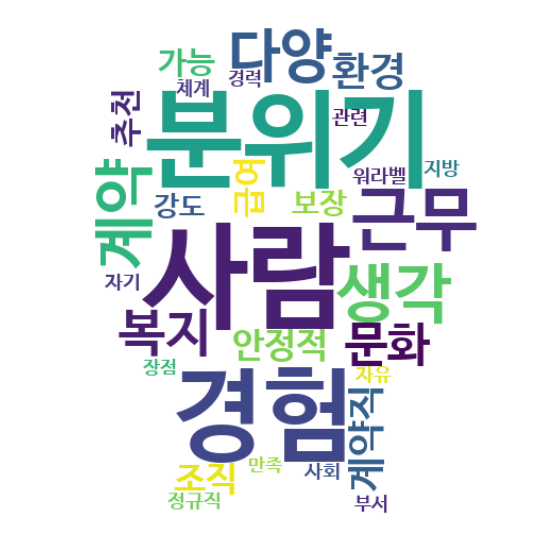

In [62]:
from PIL import Image
import numpy as np

icon=Image.open('premium-icon-seal-2284250.png')
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', 
               background_color='white',                              #배경색
               width=1500, height=1000,                              #사이즈설정 
                mask=mask
              )                                                       #마스크설정   
 
cloud = wc.generate_from_frequencies(words)                      #사전형태의 데이터
 
plt.figure(figsize=(10,10))                                           #액자사이즈설정
plt.axis('off')                                                       #테두리 선 없애기
plt.imshow(cloud,interpolation="bilinear")
fig.savefig('business_anlytics_worldcloud.png')